In [3]:
from functions.utils_agents import *
import warnings

warnings.filterwarnings('ignore')

In [8]:
agents = load_data(path='../donnees/agents_cleaned.csv')

In [5]:
agents.head()

,agentId,name,siret,address,city,zipcode,country,department,longitude,latitude
0,0,#APTIC,8.445059e+13,87 QUAI DE QUEYRIES,BORDEAUX,33100.0,FR,33,-0.561474,44.849528
1,1,LEGALLAIS SAS,1.000000e+13,TSA 70004,CAEN;,75008.0,FR,75,5.026911,45.770598
2,2,SOCIETE CORSE TRAVAUX,3.304645e+13,RN 200,ALERIA,20270.0,FR,2B,9.467566,42.129211
3,3,BECTON DICKINSON FRANCE SAS,1.000000e+13,11 RUE ARISTIDE BERGES ;,PONT E CLAIX,75008.0,FR,75,5.026911,45.770598
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,1.000000e+13,1,PARIS,75008.0,FR,75,5.026911,45.770598


# Question 1

Q1: peut-on identifier des classes de similarité d’agents économiques? Des lots?

Nous allons nous concentrer sur les variables:
- **city**
- **country**
- **department**

Pour le clustering, nous allons ajouter d'autres valeurs numériques:
- **vc**: nombre d'id different pour chaque agent 
- **buyers**: nombre de lots achété par l'agent
- **suppliers**: nombre de lots vendu par l'agent

In [9]:
buyers = load_data(path='../donnees/LotBuyers.csv')
suppliers = load_data(path='../donnees/LotSuppliers.csv')

In [10]:
buyers_gb_1 = get_gb_count(buyers, by_col='agentId', count_col='buyers')
suppliers_gb_1 = get_gb_count(suppliers, by_col='agentId', count_col='suppliers')
agents_gb_1 = get_gb_count(agents, by_col='name', count_col='vc')

In [11]:
other_1 = buyers_gb_1.drop(columns=['proportion'])
other_2 = suppliers_gb_1.drop(columns=['proportion'])
other_3 = agents_gb_1.drop(columns=['proportion'])

In [12]:
others = [
    ('agentId', 'left', other_1),
    ('agentId', 'left', other_2),
    ('name', 'left', other_3)
]
data = agents[['agentId', 'name','city', 'country', 'department']]

In [13]:
agents_merged = merge_data(data, others)

In [16]:
agents_merged

,agentId,name,city,country,department,buyers,suppliers,vc
0,0,#APTIC,BORDEAUX,FR,33,0.0,8.0,1
1,1,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1
...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0.0,7.0,7
301092,301092,STEF,REICHSTETT,FR,67,0.0,1.0,7
301093,301093,STEF,LOUDEAC,FR,22,0.0,5.0,7
301094,301094,STEF,BEGLES,FR,33,0.0,3.0,7


In [14]:
numeric_columns = get_dtypes_columns(agents_merged, dtypes=['number'], to_remove=['agentId'])
numeric_columns

['buyers', 'suppliers', 'vc']

In [15]:
categorical_columns = get_dtypes_columns(agents_merged, dtypes=['object'], to_remove=['name'])
categorical_columns

['city', 'country', 'department']

100%|██████████| 19/19 [06:54<00:00, 21.81s/it]


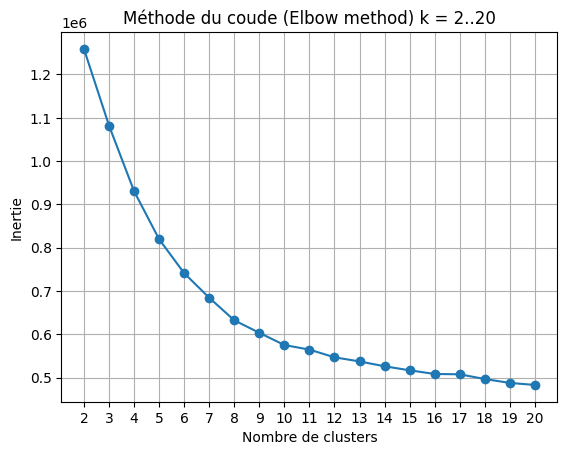

In [14]:
best_k = run_multiple_kmeans(
    data=agents_merged, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    end = 20,
    saveas = '../images/04_questions_agents_01.png'
)

In [15]:
best_k

4

In [17]:
clusters_1, inertia_1 = do_kmeans(
    data=agents_merged, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns,
    k=best_k
)

In [18]:
clusters_1

,agentId,name,city,country,department,buyers,suppliers,vc,cluster
0,0,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,0
1,1,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5,0
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,0
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1,0
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0.0,7.0,7,0
301092,301092,STEF,REICHSTETT,FR,67,0.0,1.0,7,0
301093,301093,STEF,LOUDEAC,FR,22,0.0,5.0,7,0
301094,301094,STEF,BEGLES,FR,33,0.0,3.0,7,0


In [19]:
save_data(clusters_1,path='../donnees/agents_cleaned_clusters.csv')

In [5]:
clusters_1 = load_data(path='../donnees/agents_cleaned_clusters.csv')

In [7]:
clusters_1

,agentId,name,city,country,department,buyers,suppliers,vc,cluster
0,0,#APTIC,BORDEAUX,FR,33,0.0,8.0,1,0
1,1,LEGALLAIS SAS,CAEN;,FR,75,0.0,3.0,5,0
2,2,SOCIETE CORSE TRAVAUX,ALERIA,FR,2B,0.0,62.0,2,0
3,3,BECTON DICKINSON FRANCE SAS,PONT E CLAIX,FR,75,0.0,2.0,1,0
4,4,ACOORD CADRE MULTI ATTRIBUTAIRES 1,PARIS,FR,75,0.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...
301091,301091,STEF,AVIGNON,FR,84,0.0,7.0,7,0
301092,301092,STEF,REICHSTETT,FR,67,0.0,1.0,7,0
301093,301093,STEF,LOUDEAC,FR,22,0.0,5.0,7,0
301094,301094,STEF,BEGLES,FR,33,0.0,3.0,7,0


In [21]:
cluster_1_gb = get_gb_count(clusters_1, by_col='cluster')
cluster_1_gb

,cluster,count,proportion
0,0,299892,99.600128
1,1,920,0.305550
2,3,283,0.093990
3,2,1,0.000332


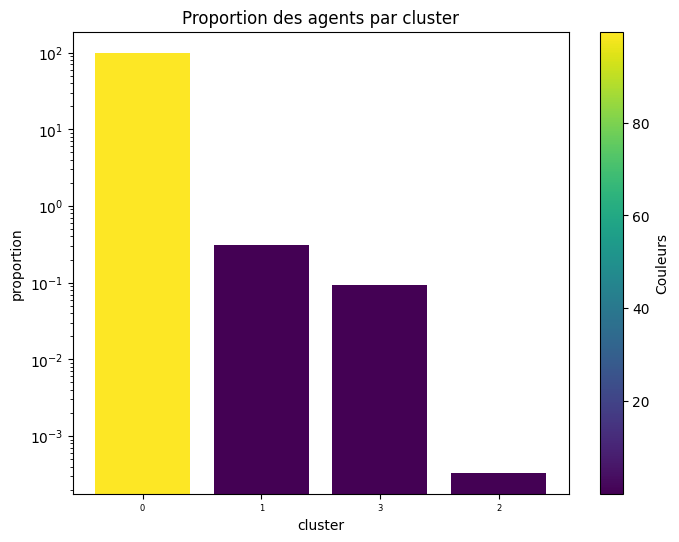

In [22]:
plot_proportion(
    data=cluster_1_gb, 
    xcol='cluster', 
    ycol='proportion',
    title='Proportion des agents par cluster',
    xtitle='cluster',
    ytitle='proportion',
    logy=True
)

In [23]:
get_moyenne_mode(
    data=clusters_1,
    numeric_features=numeric_columns,
    categorical_features=categorical_columns,
    k_best=best_k
)

,cluster,city,country,department,buyers,suppliers,vc
0,0,PARIS,FR,75,3.242451,4.524529,4.509707
1,1,PARIS,FR,59,17.359783,2.738043,460.522826
2,2,NIORT,FR,79,0.000000,11342.000000,8.000000
3,3,PARIS,FR,75,1799.561837,2.840989,11.568905


In [24]:
gb_pays = grouby_by_values(
    data=clusters_1,
    by=['cluster', 'country_group'],
    column='country',
    threshold = 500,
)

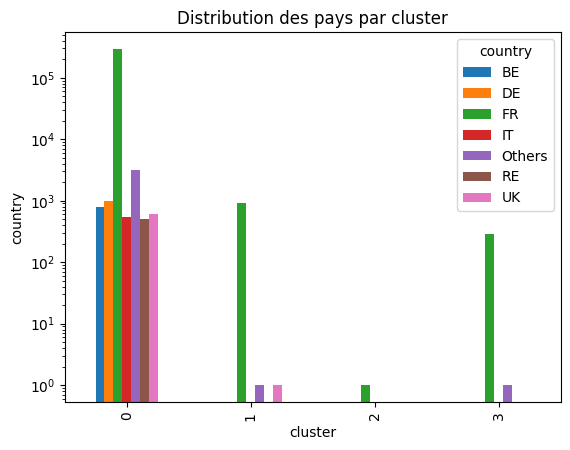

In [25]:
plot_categorial_categorical(
    data=gb_pays,
    title="Distribution des pays par cluster",
    xlabel="cluster",
    ylabel="country",
    logy=True,
        saveas = '../images/04_questions_agents_01_clusterbycountry.png'

)

In [26]:
gb_city = grouby_by_values(
    data=clusters_1,
    by=['cluster', 'city_group'],
    column='city',
    threshold= 1800
)

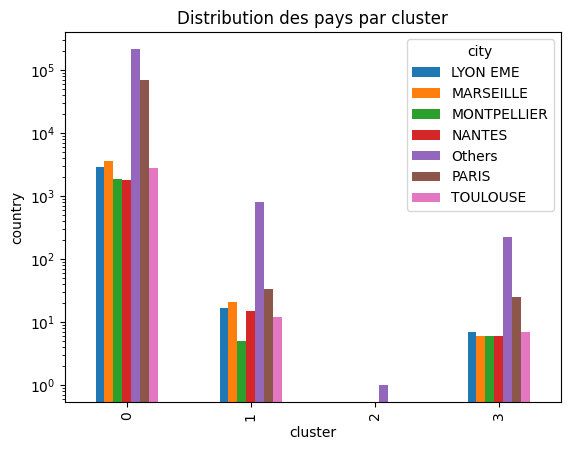

In [27]:
plot_categorial_categorical(
    data=gb_city,
    title="Distribution des pays par cluster",
    xlabel="cluster",
    ylabel="country",
    logy=True,
        saveas = '../images/04_questions_agents_01_clusterbycity.png'

)

# Question 2

Q2: quelles sont les variables et valeurs qui permettent de distinguer ces classes et/ou qui sont caractéristiques de certaines classes?

In [28]:
cluster_1_corr_cat, cluster_1_corr_num = get_all_corr_cat(
    data = clusters_1, 
    col = 'cluster', 
    num_cols = numeric_columns, 
    cat_cols = categorical_columns
)

(4, 22036) cluster city
(4, 105) cluster country
(4, 109) cluster department


In [ ]:
cluster_1_corr_cat.sort_values(by='cluster', ascending=False)

,cluster
city,0.163401
department,0.030994
country,0.007028


In [ ]:
cluster_1_corr_num

,cluster
buyers,0.0
suppliers,0.0
vc,0.0


# Question 3

Q3: comment interpréter ces classes, que signifient-elles?

In [6]:
# Résumé des statistiques descriptives pour chaque variable par cluster, incluant la moyenne et la médiane
cluster_summary = clusters_1.groupby('cluster').agg({
    'vc': ['mean', 'median'],
    'buyers': ['mean', 'median'],
    'suppliers': ['mean', 'median']
}).reset_index()

# Affichage du résumé pour interprétation
cluster_summary


cluster          vc              buyers             suppliers         
                 mean median         mean  median          mean   median
0       0    4.509707    1.0     3.242451     0.0      4.524529      1.0
1       1  460.522826  464.0    17.359783     2.0      2.738043      0.0
2       2    8.000000    8.0     0.000000     0.0  11342.000000  11342.0
3       3   11.568905    2.0  1799.561837  1410.0      2.840989      0.0

**Cluster 0** : Ce cluster, le plus grand en termes de nombre d'agents, montre une participation modérée des agents tant en tant qu'acheteurs (buyers) qu'en tant que fournisseurs (suppliers), avec une diversité de transactions (vc) relativement basse. Cela suggère que ces agents pourraient être principalement des PME ou des entités locales qui participent aux marchés publics de manière ciblée, se concentrant sur un nombre restreint de types de marchés ou sur des marchés de niche spécifiques. La distribution géographique peut montrer une prédominance dans certaines régions ou villes, reflétant potentiellement la concentration d'opportunités de marchés publics ou la présence de secteurs industriels locaux spécifiques.

**Cluster 1** : Les agents de ce cluster se distinguent par un volume d'achat (buyers) supérieur à la moyenne et une très haute diversité dans leurs transactions (vc), ce qui indique une large portée dans leurs activités d'acquisition. Ces caractéristiques suggèrent que ce cluster pourrait inclure des institutions publiques ou de grandes entreprises engagées dans une variété de projets, nécessitant un large éventail de fournitures et services. La variété des localisations géographiques au sein de ce cluster pourrait refléter une portée nationale ou une présence dans des centres économiques majeurs.

**Cluster 2** : Caractérisé par des super-acheteurs, ce cluster présente un volume d'achat (buyers) très élevé mais une diversité d'interactions (vc) modérée. Cette configuration suggère une focalisation sur des achats massifs dans certaines catégories spécifiques de biens ou services, possiblement par des entités qui gèrent de grands projets d'infrastructure ou des besoins institutionnels à grande échelle. La distribution géographique de ce cluster pourrait mettre en lumière des régions avec des projets d'infrastructure significatifs ou des sièges d'institutions gouvernementales.

**Cluster 3** : Ce cluster unique se caractérise par une activité de fournisseur (suppliers) extrêmement élevée avec une faible diversité de transactions (vc), pointant vers une entreprise ou un groupe d'entreprises spécialisées dominant dans leur secteur. Leur spécialisation et leur capacité à fournir un volume important de produits ou services pourraient les positionner comme des partenaires clés pour le secteur public. La localisation de ces agents pourrait être significativement centrée autour de pôles économiques ou technologiques importants, reflétant leur capacité à répondre aux grands besoins des marchés publics dans ces régions.

# Question 4

Q4: y a-t-il des anomalies (lots ou agents)?

In [22]:
clusters_1_anomalies = detect_anomalies(
    data =clusters_1, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns
)

In [23]:
clusters_1_anomalies_corr_data = get_corr_cat_2_cat_data(
    df = clusters_1_anomalies, 
    xcol = 'cluster', 
    ycol = 'anomaly'
)

In [24]:
clusters_1_anomalies_corr_data

anomaly,False
cluster,
0,299892
1,920
2,1
3,283


In [25]:
clusters_1_anomalies[clusters_1_anomalies['anomaly']==True]

,agentId,name,city,country,department,buyers,suppliers,vc,cluster,anomaly


### il ya pas des anomalies détectées dans les clusters des agents